In [1]:
!pip install pandas
!pip install numpy
!pip install pandas-profiling==2.7.1
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os

!pip install seaborn
import seaborn as sns

from pandas.api.types import CategoricalDtype
Train_label = pd.read_csv('Training set labels.csv')
Train_value = pd.read_csv('Training set values.csv')
Test_value = pd.read_csv('Test set values.csv')
Train = pd.merge(Train_value,Train_label, how='inner',left_on='id',right_on='id', left_index=False)

In [20]:
# Function to set up # of category for features
test_cat = 8
def max_cat(col):
    if len(Train[col].value_counts()) > (test_cat):
        top_value = Train[col].value_counts()[:(test_cat)].index.tolist()
        Train.loc[-Train[col].isin(top_value),col]='Others'
                
    return Train
        

In [21]:
Train.shape

(59400, 41)

In [22]:
Train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2]:
Train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [24]:
# Check for Duplicate values
Train.duplicated().sum()

0

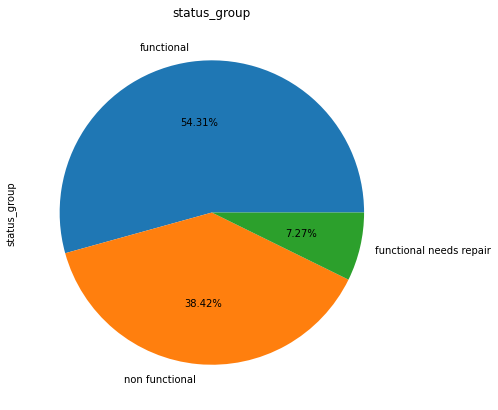

In [25]:
axs = plt.subplots(figsize=(14,7))
Train['status_group'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title('status_group')
plt.show()

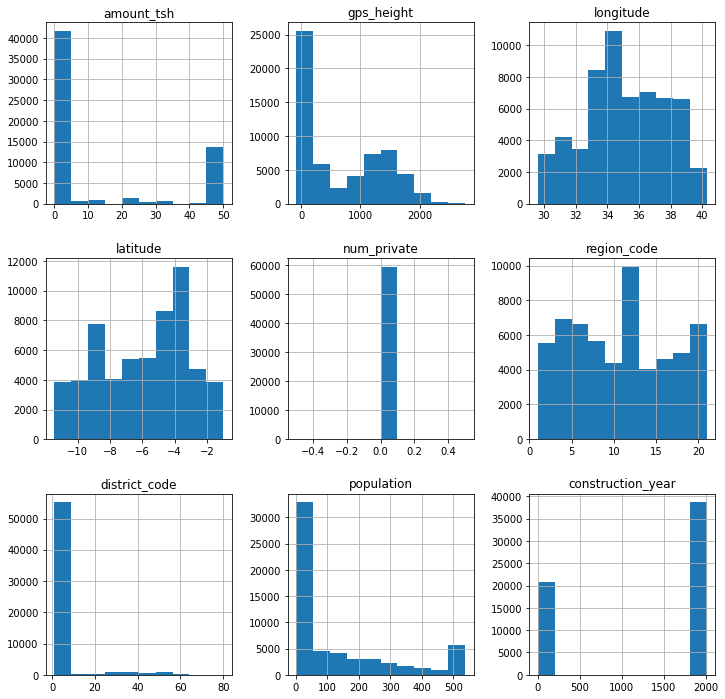

In [56]:
#Check the histogram for numeric features
Train.iloc[:,1:].hist(figsize=(12,12))
plt.show()

###  Clean All Numeric Features
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#### Cleanning - amount_tsh
- Outlier

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

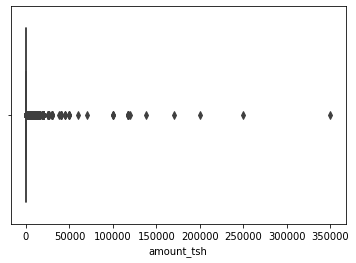

In [27]:
sns.boxplot(Train['amount_tsh'])
Train['amount_tsh'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.000000
mean        12.748566
std         20.976109
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max         50.000000
Name: amount_tsh, dtype: float64

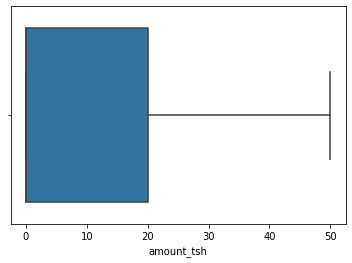

In [3]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Train['amount_tsh'].quantile(0.25)
percentile75 = Train['amount_tsh'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Train['amount_tsh'] = np.where(Train['amount_tsh']>upper_limit,upper_limit,
                      np.where(Train['amount_tsh']<lower_limit,lower_limit,Train['amount_tsh']))

sns.boxplot(Train['amount_tsh'])

Train['amount_tsh'].describe()

In [29]:
print(Train['amount_tsh'].skew()) #skewness

1.1394323559369202


#### Cleanning - 'gps_height'
After checking, nothing to be dealed with

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

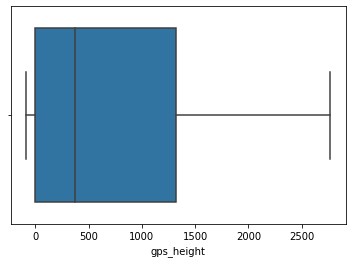

In [30]:
sns.boxplot(Train['gps_height'])
Train['gps_height'].describe()

In [31]:
print(Train['gps_height'].skew()) #skewness

0.4624020849809572


#### Cleanning - longitude | latitude
Reference: https://worldpopulationreview.com/country-locations/where-is-tanzania    
latitude :  00°59' - 11°45′ -> should be negative due South Lat  -> -0.59  ~ - 11.45
longitude:  29°10' -  40°29′ East

In [32]:
Train[['longitude','latitude']].describe()

,longitude,latitude
count,59400.000000,5.940000e+04
mean,34.077427,-5.706033e+00
std,6.567432,2.946019e+00
min,0.000000,-1.164944e+01
25%,33.090347,-8.540621e+00
50%,34.908743,-5.021597e+00
75%,37.178387,-3.326156e+00
max,40.345193,-2.000000e-08


In [4]:
long_lat_error =Train[((Train['longitude'] < 29.10)  | (Train['longitude'] > 40.29)) | ((Train['latitude'] < -11.45)  | (Train['latitude'] > -0.59))] 


In [5]:
# Correct long_lat_error using mean of corrected  long & lat
long_mean = Train[(Train['longitude'] >= 29.10)  | (Train['longitude'] <= 40.29)]['longitude'].mean()
lat_mean = Train[(Train['latitude'] >= -11.45)  | (Train['latitude'] <= -0.59)]['latitude'].mean()
#long_mean: 34.077426692028794
#lat_mean: -5.706032659626431
                  

In [6]:
Train['longitude'] = np.where(((Train.longitude <29.10 ) | (Train.longitude > 40.29)),long_mean,Train.longitude)
Train['latitude'] = np.where(((Train.latitude < -11.45) | (Train.latitude > -0.59)),lat_mean,Train.latitude)

In [7]:
# Test long_lat_error -> should be zero instance 
long_lat_error =Train[((Train['longitude'] < 29.10)  | (Train['longitude'] > 40.29)) | ((Train['latitude'] < -11.45)  | (Train['latitude'] > -0.59))] 
long_lat_error # zero instance
Train[['longitude','latitude']].describe()

,longitude,latitude
count,59400.000000,59400.000000
mean,35.114020,-5.871996
std,2.571584,2.758860
min,29.607122,-11.449849
25%,33.354079,-8.524319
50%,34.905440,-5.440285
75%,37.173618,-3.398151
max,40.287471,-0.998464


In [37]:
# export long & lat data with status for heatmap
df_long_lat = Train[['longitude','latitude','status_group']]
df_long_lat.to_csv("long_lat_status.csv")

#### Cleanning - 'num_private'
-Outlier

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

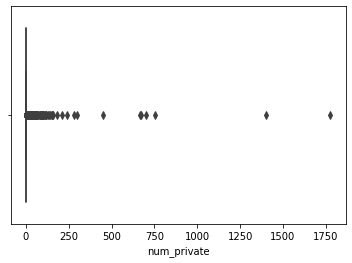

In [38]:
sns.boxplot(Train['num_private'])
Train['num_private'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_private, dtype: float64

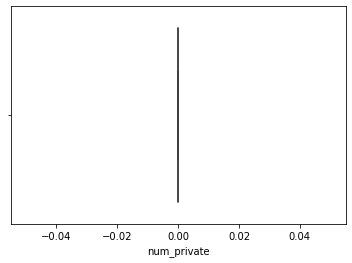

In [8]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Train['num_private'].quantile(0.25)
percentile75 = Train['num_private'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Train['num_private'] = np.where(Train['num_private']>upper_limit,upper_limit,
                      np.where(Train['num_private']<lower_limit,lower_limit,Train['num_private']))

sns.boxplot(Train['num_private'])

Train['num_private'].describe()

#### Cleanning - region_code
Reference : https://www.worldatlas.com/maps/tanzania
Standerdize region code with region
Reference: https://www.citypopulation.de/en/tanzania/admin/

In [9]:
df_region_error = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)


In [10]:
df = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df.to_csv('region_error.csv')
Train.loc[Train['region_code'] == 24,'region_code'] = 2
Train.loc[(Train['region_code'] == 18 )| (Train['region_code'] == 80),'region_code' ] = 8
Train.loc[(Train['region_code'] == 90 )| (Train['region_code'] == 99),'region_code' ] = 9
Train.loc[(Train['region_code'] == 17) & (Train['region'] == 'Mwanza'),'region_code'] = 19
Train.loc[(Train['region_code'] == 60 )| (Train['region_code'] == 40),'region_code'] = 6
Train.loc[(Train['region_code'] == 5)  & (Train['region'] == 'Tanga') ,'region_code' ] = 4
Train.loc[(Train['region_code'] == 11) & (Train['region'] == 'Shinyanga'),'region_code'] = 17
Train.loc[(Train['region_code'] == 14 )& (Train['region'] == 'Shinyanga'),'region_code'] = 17

df = Train.pivot_table('id','region','region_code',aggfunc='count').fillna(0).astype(int)
df
                                    

region_code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21
region,,,,,,,,,,,,,,,,,,,,
Arusha,0,3350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dar es Salaam,0,0,0,0,0,0,805,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,2201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,0,0,0,0,0,0,0,0,0,0,5294,0,0,0,0,0,0,0,0,0
Kagera,0,0,0,0,0,0,0,3316,0,0,0,0,0,0,0,0,0,0,0,0
Kigoma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2816,0,0,0,0
Kilimanjaro,0,0,4379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,0,0,0,0,0,0,1546,0,0,0,0,0,0,0,0,0,0,0,0
Manyara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1583


In [11]:
df_region = Train.pivot_table('id','region','status_group',aggfunc='count')
df_region.to_csv('reg_status.csv')

#### Cleanning - district_code
code with 0 -> no sense

In [12]:
Train['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [13]:
df_district_error = Train.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int)
# district_code with 0 -> error   

In [14]:
Train.loc[Train['district_code'] == 0,'district_code'] = 1
df_district = Train.pivot_table('id','region','district_code',aggfunc='count').fillna(0).astype(int) 
df_district

district_code,1,2,3,4,5,6,7,8,13,23,30,33,43,53,60,62,63,67,80
region,,,,,,,,,,,,,,,,,,,
Arusha,189,1206,109,0,201,310,1009,0,0,0,326,0,0,0,0,0,0,0,0
Dar es Salaam,93,497,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,911,0,361,347,358,224,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,728,530,650,2473,564,0,349,0,0,0,0,0,0,0,0,0,0,0,0
Kagera,771,487,402,403,0,88,260,236,0,0,669,0,0,0,0,0,0,0,0
Kigoma,874,1159,727,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,595,519,877,1225,620,109,434,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,1,7,300,0,0,0,0,0,391,293,0,0,154,291,0,109,0,0,0
Manyara,550,274,297,276,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Cleanning - 'population'

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

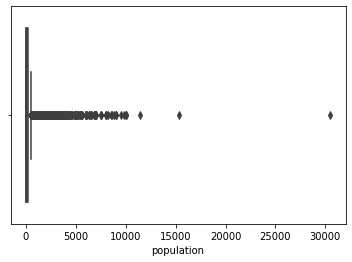

In [15]:
sns.boxplot(Train['population'])
Train['population'].describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    59400.000000
mean       128.424537
std        175.514950
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max        537.500000
Name: population, dtype: float64

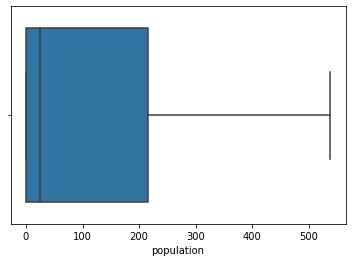

In [16]:
# Inter-Quartile Range (IQR) proximity rule
percentile25 = Train['population'].quantile(0.25)
percentile75 = Train['population'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# apply the Capping on Outliers
Train['population'] = np.where(Train['population']>upper_limit,upper_limit,
                      np.where(Train['population']<lower_limit,lower_limit,Train['population']))

sns.boxplot(Train['population'])
Train['population'].describe()

In [17]:
print(Train['population'].skew()) #skewness

1.2355129207615902


#### Cleanning - 'construction_year'
- Missing Value
- Outlier

In [7]:
Construct_year = pd.read_csv('pipe_construct_years.csv')
Construct_year.shape
Construct_year.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,clusters
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,6
59397,1960,1960.0,1960,1960,1960,1960,1960.000000,1960.000000,1960,1960,...,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960
59398,1960,1960.0,1960,1960,1960,1960,1960.000000,1960.000000,1960,1960,...,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0


###  Clean All Category Features

#### Cleanning - funder 
- Missing Value

In [2]:
Train['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

In [15]:
# to check whether special character
import string
spec_character = string.punctuation
Train['funder'].str.strip(spec_character).astype(bool).any() # True
spec_character


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def strip_character(dataCol):
    r = re.compile(r'[spec_character]')
    return r.sub('', dataCol)

Train['funder'] = Train['funder'].apply(strip_character(Train['funder']))

TypeError: expected string or bytes-like object

#### Cleanning - installer 
- Missing Value

In [7]:
Train['installer'].str.strip(spec_character).astype(bool).any()

True

In [21]:
#### Cleanning - wpt_name
Train['wpt_name'].value_counts() #3563 - none

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

#### Cleanning - basin
Reference : https://www.researchgate.net/figure/Map-of-the-nine-River-Basin-Offices-in-Tanzania_fig1_312373453

In [22]:
Train['basin'].value_counts()  # with " / ";  should be removed

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [23]:
test = Train.loc[Train['basin'] == 'Wami / Ruvu','basin']
test = test.str.replace('/','')

test2 = Train.loc[Train['basin'] == 'Ruvuma / Southern Coast','basin']
test2 = test2.str.replace('/','and')


In [24]:
#Train['basin'] = Train['basin'] .astype(str) 

Train.loc[Train['basin'] == 'Wami / Ruvu','basin'] = test
Train.loc[Train['basin'] == 'Ruvuma / Southern Coast','basin'] = test2


In [25]:
Train['basin'].value_counts()

Lake Victoria                10248
Pangani                       8940
Rufiji                        7976
Internal                      7785
Lake Tanganyika               6432
Wami  Ruvu                    5987
Lake Nyasa                    5085
Ruvuma and Southern Coast     4493
Lake Rukwa                    2454
Name: basin, dtype: int64

#### Cleanning - subvillage 
- missing value
- inconsistent value including (M, 1, I K)
The mode of a set of data values is the value that appears most often. It is the value at which the data is most likely to be sampled.

In [ ]:
Train['subvillage'].value_counts()[:60]

In [26]:
# to deal with missing value
Train['subvillage'].fillna(Train['subvillage'].mode()[0], inplace=True)

In [27]:
# to deal with inconsistent value including (M, 1, I K)
Train.loc[Train['subvillage'] == 'M', 'subvillage'] = 'Other'
Train.loc[Train["subvillage"] == '1', 'subvillage'] = "Other"
Train.loc[Train['subvillage'] == 'I', 'subvillage'] = 'Other'
Train.loc[Train['subvillage'] == 'K', 'subvillage'] = 'Other'
Train['subvillage'].value_counts()[:60]

Madukani                879
Shuleni                 506
Other                   505
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Miembeni                134
Msikitini               134
Kibaoni                 114
Kanisani                111
Mapinduzi               109
Mjini                   108
Mjimwema                108
Mkwajuni                104
Mwenge                  102
Mabatini                 98
Azimio                   98
Mbugani                  95
Mission                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
Kichangani               84
Senta                    84
Mtaa Wa Kitunda Kati     84
Misufini                 83
Center                   82
Nyerere                  79
Amani                    77
Kawawa              

In [28]:
#### Cleanning - region
Train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

#### Cleanning - lga 
no errors
Cosider Rural vs Urban - to be visulization

In [29]:
Train["lga"].value_counts() #125

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [30]:
df_lga = Train[["region","lga","status_group"]]
df_lga['status_cat'] = df_lga['status_group'].astype('category')
df_lga['status_group'] = df_lga['status_group'].astype('category')
df_lga.info()
df_lga.info()
df_lga['status_cat']= df_lga['status_group'].cat.codes
df_lga = df_lga.pivot_table(df_lga, index = ['region','lga'], columns = 'status_group',aggfunc= 'count' )
df_lga

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   region        59400 non-null  object  
 1   lga           59400 non-null  object  
 2   status_group  59400 non-null  category
 3   status_cat    59400 non-null  category
dtypes: category(2), object(2)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   region        59400 non-null  object  
 1   lga           59400 non-null  object  
 2   status_group  59400 non-null  category
 3   status_cat    59400 non-null  category
dtypes: category(2), object(2)
memory usage: 1.5+ MB


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


status_cat                                       
status_group        functional functional needs repair non functional
region lga                                                           
Arusha Arusha Rural        875                      48            329
       Arusha Urban         42                       7             14
       Babati                0                       0              0
       Bagamoyo              0                       0              0
       Bahi                  0                       0              0
...                        ...                     ...            ...
Tanga  Tunduru               0                       0              0
       Ukerewe               0                       0              0
       Ulanga                0                       0              0
       Urambo                0                       0              0
       Uyui                  0                       0              0

[2625 rows x 3 columns]

In [31]:
df_lga = pd.DataFrame(df_lga.to_records())
#df_lga.loc[df_lga["lga"].str.contains(("Rural"), case=False)][["region","lga",]]
df_lga.loc[df_lga["lga"].str.contains(("Rural"), case=False)][:]#9552
#df_lga.loc[Train["lga"].str.contains("Urban", case=False)]["lga"] #1683
df_lga.columns[3]

df_lga  = df_lga.rename(columns={"('status_cat', 'functional')":'functional',
                       "('status_cat', 'functional needs repair')":'functional needs repair',
                       "('status_cat', 'non functional')":'non functional'})
df_lga_status = df_lga.loc[df_lga["functional"] != 0]    

df_lga_status 

,region,lga,functional,functional needs repair,non functional
0,Arusha,Arusha Rural,875,48,329
1,Arusha,Arusha Urban,42,7,14
27,Arusha,Karatu,316,1,9
50,Arusha,Longido,200,29,81
65,Arusha,Meru,657,32,320
...,...,...,...,...,...
2552,Tanga,Lushoto,433,59,202
2568,Tanga,Mkinga,224,0,64
2580,Tanga,Muheza,219,0,115
2595,Tanga,Pangani,65,3,237


In [32]:
#Export region_lga for visulization
df_lga_status.to_csv('df_lga_status.csv')


#### Cleanning - ward
There 2092 uniqu value - consider use function max_cat to pick top value
The Ward Profiles provide demographic information on population by age, households and dwelling types, families, language group, household tenure and period of construction; immigration, mobility, ethnic origin and visible minorities; education and labour force; income and shelter cost. 

In [33]:
Train["ward"].value_counts() #2092
#max_cat('ward')

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

#### Cleanning - Public_meeting
Replace Public_meeting missing values by unknown

Text(0.5, 1.0, 'Public Meeting')

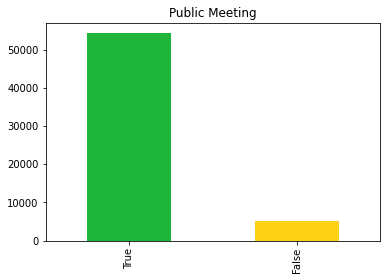

In [34]:
Train['public_meeting'].fillna(Train['public_meeting'].mode()[0], inplace=True)
tanzania_flag_colors = ['#1eb53a', '#fcd116', '#00a3dd', 'black']
Train.public_meeting.value_counts().plot(kind='bar', color=tanzania_flag_colors);
plt.title("Public Meeting")

In [35]:
#### Cleanning - scheme_management
Train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [36]:
Train['scheme_management'].fillna(Train['scheme_management'].mode()[0],inplace=True)

In [37]:
#### Cleanning - scheme_name
Train['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [53]:
Train['scheme_name'] = Train['scheme_name'].apply(lambda a: "Other" if len(str(a)) == 1 else a)
Train['scheme_name'].fillna(Train['scheme_name'].mode()[0],inplace=True)

In [54]:
Train['scheme_name'].value_counts()

Other                        30285
None                           644
Borehole                       546
Chalinze wate                  405
DANIDA                         379
                             ...  
Mnazi mmoja                      1
Handeni Trunk Maini(             1
Lake victoria pipe scheme        1
BL Moniko Shule                  1
Mtawanya                         1
Name: scheme_name, Length: 2676, dtype: int64

In [40]:
#### Cleanning - permit
Train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [41]:
Train['permit'].fillna(Train['permit'].mode()[0], inplace=True)

In [42]:
Train['permit'].describe()

count     59400
unique        2
top        True
freq      41908
Name: permit, dtype: object

In [43]:
#### Cleanning - extraction_type
Train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [45]:
Train['extraction_type'] = Train['extraction_type'].str.replace("/"," ")
Train['extraction_type'] = Train['extraction_type'].str.replace("other - ","")
Train['extraction_type'].value_counts()

gravity              26780
nira tanira           8154
other                 6430
submersible           4764
swn 80                3670
mono                  2865
india mark ii         2400
afridev               1770
ksb                   1415
rope pump              451
swn 81                 229
windmill               117
india mark iii          98
cemo                    90
play pump               85
walimi                  48
climax                  32
mkulima shinyanga        2
Name: extraction_type, dtype: int64

In [46]:
#### Cleanning - extraction_type_group
Train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [48]:
Train['extraction_type_group'] = Train['extraction_type_group'].str.replace("/"," ")
Train['extraction_type_group'] = Train['extraction_type_group'].str.replace("other ","")
Train['extraction_type_group'] = Train['extraction_type_group'].str.replace("-"," ")
Train['extraction_type_group'].value_counts()

gravity           26780
nira tanira        8154
other              6430
submersible        6179
swn 80             3670
mono               2865
india mark ii      2400
afridev            1770
rope pump           451
handpump            364
motorpump           122
wind powered        117
india mark iii       98
Name: extraction_type_group, dtype: int64

In [49]:
#### Cleanning - extraction_class
Train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [50]:
Train['extraction_type_class'] = Train['extraction_type_class'].str.replace(" ","")
Train['extraction_type_class'] = Train['extraction_type_class'].str.replace("-","")
Train['extraction_type_class'].value_counts()

gravity        26780
handpump       16456
other           6430
submersible     6179
motorpump       2987
ropepump         451
windpowered      117
Name: extraction_type_class, dtype: int64

In [57]:
#### Cleanning - management
Train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [58]:
Train['management'] = Train['management'].str.replace("other - ","")
Train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
school                 99
trust                  78
Name: management, dtype: int64

In [60]:
#### Cleanning - management_group
Train['management_group'].value_counts()
Train['management_group'] = Train['management_group'].str.replace("-"," ") 

In [61]:
Train['management_group'].value_counts()

user group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [63]:
#### Cleanning - payment
Train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [64]:
#### Cleanning - payment_type
Train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [65]:
#### Cleanning - watet_qualityf
Train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [66]:
#### Cleanning - quality_group | quality
Train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [67]:
#### Cleanning - quantity_group | quantity
Train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [68]:
Train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

#### Cleanning - source | source type | source_calss

In [69]:
# Source #10
Train.groupby('source')['id'].nunique().sort_values(ascending=False)
#10  Combine other & Unknow ;  source vs source_type similar, to consider use source_type for model
Train.pivot_table('id','status_group','source',aggfunc='count').fillna(0).astype(int)

source,dam,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown
status_group,,,,,,,,,,
functional,253,497,162,5422,126,1386,5465,8324,10592,32
functional needs repair,24,17,12,491,1,314,1221,957,1276,4
non functional,379,360,591,5162,85,595,2926,7543,5153,30


In [70]:
# Source type #7
Train.groupby('source_type')['id'].nunique().sort_values(ascending=False) 
Train.pivot_table('id','status_group','source_type',aggfunc='count').fillna(0).astype(int)

source_type,borehole,dam,other,rainwater harvesting,river/lake,shallow well,spring
status_group,,,,,,,
functional,5919,253,158,1386,5627,8324,10592
functional needs repair,508,24,5,314,1233,957,1276
non functional,5522,379,115,595,3517,7543,5153


In [ ]:
# source_class #3 
Train.groupby('source_class')['id'].nunique().sort_values(ascending=False) #3
Train.pivot_table('id','status_group','source_class',aggfunc='count').fillna(0).astype(int)

### Cleanning -  waterpoint_type  | waterpoint_type_group 

In [ ]:
Train.groupby('waterpoint_type')['id'].nunique().sort_values(ascending=False) #7
Train.pivot_table('id','status_group','waterpoint_type',aggfunc='count').fillna(0).astype(int)

In [ ]:
Train.groupby('waterpoint_type_group')['id'].nunique().sort_values(ascending=False) #6
Train.pivot_table('id','status_group','waterpoint_type_group',aggfunc='count').fillna(0).astype(int)

In [ ]:
Train[['region','population']]
df_pop = Train.pivot_table('id','region','population',aggfunc='sum').fillna(0).astype(int) 
df_pop['sum'] = df_pop.sum(axis = 1)
df_pop['sum']